## Gerekli Kütüphanelerin İmport Edilmesi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

## Veriyi indirme ve okuma aşaması

In [2]:
data = pd.read_csv("dataset/dataset_Facebook.csv")
data

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


## Veri Madenciliği // Eksik Verileri Temizleme // Veri Kontrolü

In [3]:
## Columnlardaki eksik verileri tespit etme.
data.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [4]:
## Paid Column'daki eksik verileri temizleme işlemi
# "Paid" sütunundaki NaN (eksik) verileri 0 ile doldur

data["Paid"].fillna(0, inplace=True)
data

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


## Veri Bölme (X ve Y {X_train, X_test, Y_train, Y_test}) işlemi ve Ağırlık Vektörleri Tanımlanması

In [5]:
## Burada Önce X ve Y değerlerimizi belirlemek gerekiyor.

X = data.iloc[:, [0, 2, 3, 4, 5, 6]] ## Page Total Likes, Category, Post Month, Post Weekday, Post Hour, Paid (Beğeni,Kategori,Ay,Hafta,Saat,Ödeme)
y = data.iloc[:, 18:19] ## Total Interactions(Toplam Etkileşim)


# x verileri için Min-Max ölçeklendirme işlemi
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

# y verileri için Min-Max ölçeklendirme işlemi
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y)

## % 80 eğitim ve % 20 test verisi ve 42 random durumu ile veriler train ve test olarak seçiliyor.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Boyut Kontrolü

In [6]:
print(X_train.shape) ## 400 adet veri ve 6 boyut
print(y_train.shape) ## 400 adet veri ve 1 boyut

print(X_test.shape) ## 100 adet veri ve 6 boyut
print(y_test.shape) ## 100 adet veri ve 1 boyut

(400, 6)
(400, 1)
(100, 6)
(100, 1)


## Lineer Regresyon Modeli Oluşturma

In [7]:
model = LinearRegression() ## Model lineer regresyon seçildi
model.fit(X_train, y_train) ## model eğitildi


LinearRegression()

## Model Tahmin Etme Aşaması

In [8]:
y_pred = model.predict(X_test)

## d. Eğitim ve test verileri için Toplam Kare Hatayı (Sum Squared Error) kaydedin

In [9]:
sse_train = np.sum((y_train - model.predict(X_train)) ** 2)
sse_test = np.sum((y_test - model.predict(X_test)) ** 2)


print("Eğitim Verileri SSE:", sse_train)
print("Test Verileri SSE:", sse_test)

Eğitim Verileri SSE: 1.5982885539971994
Test Verileri SSE: 0.13107667041498353


## e. Ağırlık Matrisi, Eğitim Hataları ve Test Hataları Hesaplama:



In [10]:
# Ağırlık matrisi
weights = model.coef_ ## .coef_ modelin ağırlık matrisini döndürür.

train_errors = y_train - model.predict(X_train) ## İstenilen Değer - Tahmin Edilen Değer
test_errors = y_test - model.predict(X_test) ## İstenilen Değer - Tahmin Edilen Değer

print("Ağırlık Matrisi:", weights)
print("Eğitim Hataları:", train_errors)
print("Test Hataları:", test_errors)

Ağırlık Matrisi: [[ 0.03460746  0.02042455 -0.02222371 -0.01192656  0.00368734  0.01470825]]
Eğitim Hataları: [[-3.41038371e-02]
 [ 2.36272495e-02]
 [-4.07902788e-02]
 [-4.89961741e-02]
 [-3.88188880e-02]
 [ 1.37179338e-02]
 [-4.07231792e-02]
 [-1.91031785e-02]
 [-2.39749019e-02]
 [-1.79800741e-02]
 [-1.49953014e-02]
 [-5.77331110e-03]
 [ 1.95362624e-03]
 [-9.22037388e-03]
 [ 3.94328376e-02]
 [-2.69139815e-02]
 [-2.40694845e-02]
 [-1.10195110e-02]
 [-1.69495526e-02]
 [-1.31579991e-02]
 [-2.51120403e-02]
 [ 1.30356508e-01]
 [-1.95121357e-02]
 [ 7.17374073e-03]
 [-3.38292624e-02]
 [-2.17984910e-02]
 [-2.05691848e-02]
 [-1.16472223e-02]
 [ 1.21650104e-03]
 [-2.97731419e-02]
 [-2.71951646e-02]
 [-3.82467571e-02]
 [ 5.11833917e-03]
 [ 9.92953755e-04]
 [ 9.58910349e-03]
 [-1.13068606e-02]
 [-3.02436947e-02]
 [-7.99922522e-03]
 [ 7.26823895e-02]
 [-4.77570486e-02]
 [-8.27061787e-03]
 [-2.81124963e-02]
 [-9.77561365e-03]
 [-1.95594090e-03]
 [-1.61924104e-03]
 [-3.68579360e-03]
 [-1.89974464e-0

## f. Eğitim ve Test Hatalarını Çizme ve Yorumlama:



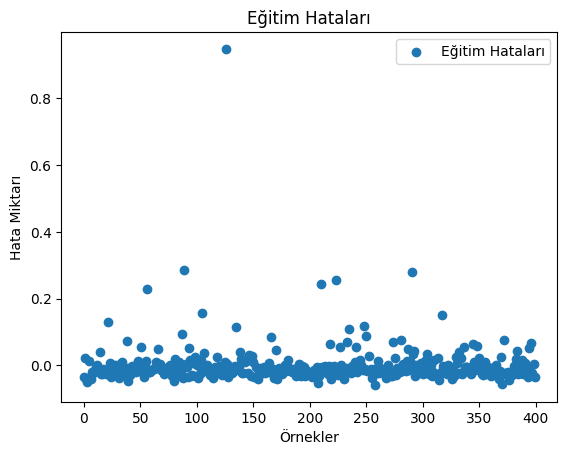

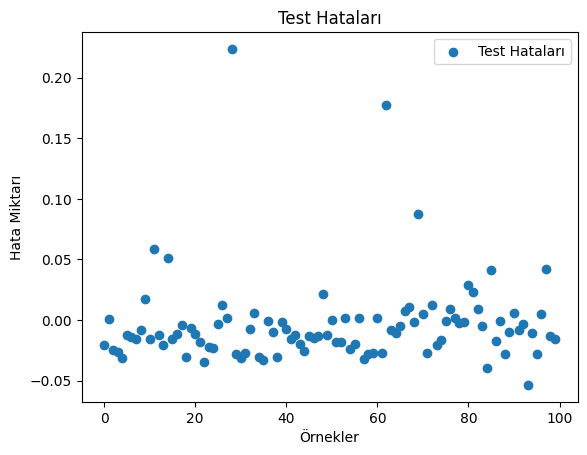

In [11]:
# Eğitim hatalarını çizme
plt.scatter(range(len(train_errors)), train_errors, label='Eğitim Hataları')
plt.xlabel('Örnekler')
plt.ylabel('Hata Miktarı')
plt.legend()
plt.title('Eğitim Hataları')
plt.show()

# Test hatalarını çizme
plt.scatter(range(len(test_errors)), test_errors, label='Test Hataları')
plt.xlabel('Örnekler')
plt.ylabel('Hata Miktarı')
plt.legend()
plt.title('Test Hataları')
plt.show()

## Grafik için Yorumlarım:

Eğitim hatalarının çoğunun sıfıra yakın olması, modelin eğitim verilerine uyum sağladığını gösteriyor. Ancak birkaç eğitim örneklerinde uçuk hatalar var, bu da modelin verilere tam olarak uymadığını veya overfitting yapabileceğini gösterebilir. fakat bu kadar küçük oranda az hatalar modelimizi etkilemeyeceğini düşünüyorum

Test hatalarının dağılımı daha önemlidir, çünkü modelin gerçek dünyada nasıl performans göstereceğini yansıtır. Test hatalarının çoğunun sıfıra yakın olması olumlu bir işarettir diye düşünüyorum, ancak uçuk hatalar yine eğitim hatalarında olduğu gibi burda da  dikkatimi çekiyor. Bu uçuk hatalar, modelin bazı özel veri noktalarını yanlış tahmin ettiğini veya anormal durumları işlediğini gösterebilir. fakat bu kadar küçük oranda bir problem çıkarmayacağını düşünüyorum.



## Gradyan İnişinin Uygulanması

Maliyet Fonksiyonu Oluşturma:

In [12]:
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def maliyet_fonksiyonu(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return mean_squared_error(y, predictions) / (2 * m)

Gradyan Hesaplama: 

In [13]:
def gradyan_hesapla(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    gradient = (X.T.dot(predictions - y)) / m
    return gradient

Gradyan İnişi Uygulama:

In [14]:
learning_rate = 0.01
num_iterations = 1000
theta = np.zeros(X_train.shape[1]).reshape(-1, 1)

cost_history = []

for _ in range(num_iterations):
    gradient = gradyan_hesapla(X_train, y_train, theta)
    theta = theta - learning_rate * gradient
    cost = maliyet_fonksiyonu(X_train, y_train, theta)
    print(f'Iterasyon {_}: Maliyet = {cost}')
    cost_history.append(cost)

Iterasyon 0: Maliyet = 6.651672517578696e-06
Iterasyon 1: Maliyet = 6.603983560645892e-06
Iterasyon 2: Maliyet = 6.5578119917793416e-06
Iterasyon 3: Maliyet = 6.513109118531546e-06
Iterasyon 4: Maliyet = 6.469827812447662e-06
Iterasyon 5: Maliyet = 6.427922458824858e-06
Iterasyon 6: Maliyet = 6.387348908085599e-06
Iterasyon 7: Maliyet = 6.348064428712981e-06
Iterasyon 8: Maliyet = 6.310027661697987e-06
Iterasyon 9: Maliyet = 6.273198576450052e-06
Iterasyon 10: Maliyet = 6.2375384281239345e-06
Iterasyon 11: Maliyet = 6.203009716317441e-06
Iterasyon 12: Maliyet = 6.169576145095895e-06
Iterasyon 13: Maliyet = 6.137202584300787e-06
Iterasyon 14: Maliyet = 6.105855032101345e-06
Iterasyon 15: Maliyet = 6.075500578749066e-06
Iterasyon 16: Maliyet = 6.0461073714966054e-06
Iterasyon 17: Maliyet = 6.017644580643591e-06
Iterasyon 18: Maliyet = 5.990082366673174e-06
Iterasyon 19: Maliyet = 5.9633918484442785e-06
Iterasyon 20: Maliyet = 5.937545072405625e-06
Iterasyon 21: Maliyet = 5.91251498279873

1000 iterasyonda gradyan inişinin maliyet değişim grafiği

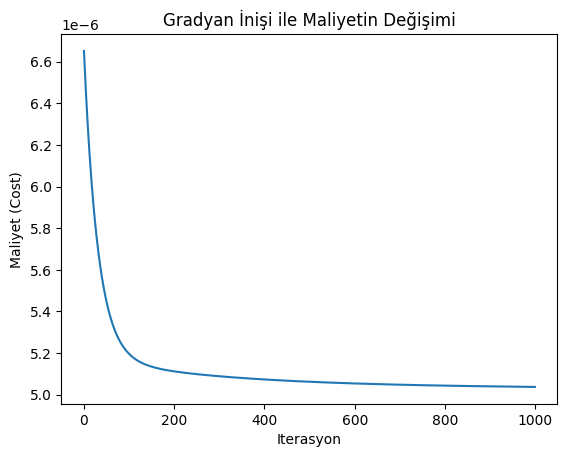

In [15]:
# Maliyet fonksiyonunun değişimini görselleştirme
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterasyon')
plt.ylabel('Maliyet (Cost)')
plt.title('Gradyan İnişi ile Maliyetin Değişimi')
plt.show()
